In [1]:
# This tutorial is the second part of 3D Point Cloud processing, where we are looking more at LiDAR point-cloud sampling

In [2]:
import numpy as np
import laspy as lp

In [14]:
input_path="/Users/GA/Documents/_ECE_2022/EC601/"
dataname="NZ19_Wellington"

In [15]:
point_cloud=lp.read(input_path+dataname+".las")

In [24]:
points=np.vstack((point_cloud.x,point_cloud.y,point_cloud.z)).transpose()
colors=np.vstack((point_cloud.red,point_cloud.green,point_cloud.blue)).transpose()

In [25]:
# Point Cloud Random subsampling
factor=160
# This will keep 1 row every 160 rows
# This divides the size of the original point cloud
decimated_points=points[::factor]

In [26]:
# Point Cloud Grid Sampling

# For each cell of the grid, only one representative point will be kept
voxel_size=6
# Compute bounding box and put into small cubic grids(voxels) with L,W,H = 6
# This returns the number of empty voxels (grids) in each direction
nb_vox=np.ceil((np.max(points,axis=0) - np.min(points,axis=0))/voxel_size)

# Test each small voxel to see if it contains one or more points
# Keep it if it does and make note of indexes
non_empty_voxel_keys,inverse,nb_pts_per_voxel=np.unique(((points-np.min(points,axis=0)) // voxel_size).astype(int),axis=0,return_inverse=True,return_counts=True)
idx_pts_vox_sorted=np.argsort(inverse)

In [27]:
# Compute representant of voxel
voxel_grid={}
grid_barycenter=[]
last_seen=0

# loop that iterates over each non-empty voxel
# Complete the voxel grid dictionary with contained points
# Then compute representative (barycenter)
for idx,vox in enumerate(non_empty_voxel_keys):
    voxel_grid[tuple(vox)]=points[idx_pts_vox_sorted[last_seen:last_seen+nb_pts_per_voxel[idx]]]
    grid_barycenter.append(np.mean(voxel_grid[tuple(vox)],axis=0))
    last_seen+=nb_pts_per_voxel[idx]


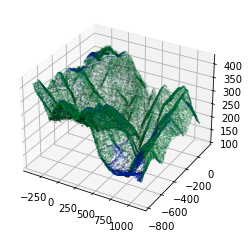

In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

decimated_colors=colors[::factor]
ax=plt.axes(projection='3d')
ax.scatter(decimated_points[:,0],decimated_points[:,1],decimated_points[:,2],c=decimated_colors/65535, s=0.01)
plt.show()

In [33]:
# Save data to ascii file format
np.savetxt(input_path+dataname+"_voxel-best_point_%s.poux" %(voxel_size),grid_barycenter, delimiter=";",fmt="%s")

In [34]:
# Put together in a function:
def cloud_decimation(point_cloud,factor):
    points=np.vstack((point_cloud.x,point_cloud.y,point_cloud.z)).transpose()
    colors=np.vstack((point_cloud.red,point_cloud.green,point_cloud.blue)).transpose()
    decimated_points=points[::factor]
    decimated_colors=colors[::factor]
    return decimated_points, decimated_colors